# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [76]:
pip install --upgrade plotly

## Import Statements

In [77]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [78]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [79]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [80]:
print("Income DataFrame")
print(f"The shape of income dataFrame is : {df_hh_income.shape} and The income dataFrame has {df_hh_income.shape} rows and columns")
print("\n")
print("PCT Poverty")
print(f"The shape of pct poverty dataFrame is : {df_pct_poverty.shape} and The pct poverty dataFrame has {df_pct_poverty.shape} rows and columns")
print("\n")
print("PCT Completed")
print(f"The shape of pct completed dataFrame is : {df_pct_completed_hs.shape} and The pct completed dataFrame has {df_pct_poverty.shape} rows and columns")
print("\n")
print("Share Race City")
print(f"The shape of share race city dataFrame is : {df_share_race_city.shape} and The share race city dataFrame has {df_share_race_city.shape} rows and columns")
print("\n")
print("Fatalities")
print(f"The shape of fatalities dataFrame is : {df_fatalities.shape} and The fatalities dataFrame has {df_fatalities.shape} rows and columns")

Income DataFrame
The shape of income dataFrame is : (29322, 3) and The income dataFrame has (29322, 3) rows and columns


PCT Poverty
The shape of pct poverty dataFrame is : (29329, 3) and The pct poverty dataFrame has (29329, 3) rows and columns


PCT Completed
The shape of pct completed dataFrame is : (29329, 3) and The pct completed dataFrame has (29329, 3) rows and columns


Share Race City
The shape of share race city dataFrame is : (29268, 7) and The share race city dataFrame has (29268, 7) rows and columns


Fatalities
The shape of fatalities dataFrame is : (2535, 14) and The fatalities dataFrame has (2535, 14) rows and columns


In [81]:
print("Income DataFrame")
print(f"Income DataFrame columns name are : {df_hh_income.columns}")
print("\n")
print("PCT Poverty")
print(f"Pct poverty dataFrame columns name are : {df_pct_poverty.columns}")
print("\n")
print("PCT Completed")
print(f"Pct completed dataFrame columns name are : {df_pct_completed_hs.columns}")
print("\n")
print("Share Race City")
print(f"Share race city dataFrame columns name are : {df_share_race_city.columns}")
print("\n")
print("Fatalities")
print(f"Fatalities dataFrame columns name are : {df_fatalities.columns}")

Income DataFrame
Income DataFrame columns name are : Index(['Geographic Area', 'City', 'Median Income'], dtype='object')


PCT Poverty
Pct poverty dataFrame columns name are : Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


PCT Completed
Pct completed dataFrame columns name are : Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


Share Race City
Share race city dataFrame columns name are : Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


Fatalities
Fatalities dataFrame columns name are : Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [82]:
print("Income DataFrame")
print(f"Income DataFrame columns name are : {df_hh_income.columns}")
print("\n")
print("PCT Poverty")
print(f"Pct poverty dataFrame columns name are : {df_pct_poverty.columns}")
print("\n")
print("PCT Completed")
print(f"Pct completed dataFrame columns name are : {df_pct_completed_hs.columns}")
print("\n")
print("Share Race City")
print(f"Share race city dataFrame columns name are : {df_share_race_city.columns}")
print("\n")
print("Fatalities")
print(f"Fatalities dataFrame columns name are : {df_fatalities.columns}")

Income DataFrame
Income DataFrame columns name are : Index(['Geographic Area', 'City', 'Median Income'], dtype='object')


PCT Poverty
Pct poverty dataFrame columns name are : Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


PCT Completed
Pct completed dataFrame columns name are : Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


Share Race City
Share race city dataFrame columns name are : Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


Fatalities
Fatalities dataFrame columns name are : Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [83]:
print("Income DataFrame")
print(f"Is there any NaN value in Income DataFrame ? {df_hh_income.isna().values.any()} and is there any duplicates value? {df_hh_income.duplicated().values.any()}")
print("\n")
print("PCT Poverty")
print(f"Is there any NaN value in Pct Poverty DataFrame ? {df_pct_poverty.isna().values.any()} and is there any duplicates value? {df_pct_poverty.duplicated().values.any()}")
print("\n")
print("PCT Completed")
print(f"Is there any NaN value in Pct Completed DataFrame ? {df_pct_completed_hs.isna().values.any()} and is there any duplicates value? {df_pct_completed_hs.duplicated().values.any()}")
print("\n")
print("Share Race City")
print(f"Is there any NaN value in Share Race city DataFrame ? {df_share_race_city.isna().values.any()} and is there any duplicates value? {df_share_race_city.duplicated().values.any()}")
print("\n")
print("Fatalities")
print(f"Is there any NaN value in Fatalities DataFrame ? {df_fatalities.isna().values.any()} and is there any duplicates value? {df_fatalities.duplicated().values.any()}")

Income DataFrame
Is there any NaN value in Income DataFrame ? True and is there any duplicates value? False


PCT Poverty
Is there any NaN value in Pct Poverty DataFrame ? False and is there any duplicates value? False


PCT Completed
Is there any NaN value in Pct Completed DataFrame ? False and is there any duplicates value? False


Share Race City
Is there any NaN value in Share Race city DataFrame ? False and is there any duplicates value? False


Fatalities
Is there any NaN value in Fatalities DataFrame ? True and is there any duplicates value? False


In [84]:
df_hh_income.head(20)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
5,AL,Alabaster city,71816
6,AL,Albertville city,32911
7,AL,Alexander City city,29874
8,AL,Alexandria CDP,56058
9,AL,Aliceville city,21131


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [85]:
print("Income DataFrame")
df_hh_income.isnull().sum()

Income DataFrame


Geographic Area     0
City                0
Median Income      51
dtype: int64

In [86]:
df_hh_income_cleaner = df_hh_income.fillna(0)
df_hh_income_cleaner.isnull().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [87]:
df_fatalities.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [88]:
df_fatalities.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.00,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [89]:
df_fatalities_cleaner = df_fatalities.fillna(0)
df_fatalities_cleaner.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [90]:
df_fatalities_cleaner.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.00,M,B,Knoxville,PA,False,attack,Not fleeing,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [91]:
df_pct_poverty.head(10)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7
7,AL,Alexander City city,30.4
8,AL,Alexandria CDP,9.7
9,AL,Aliceville city,41.3


In [92]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [93]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

In [94]:
city_poverty = df_pct_poverty.groupby(["Geographic Area"])["poverty_rate"].sum().reset_index()
city_poverty_sorted =city_poverty.sort_values("poverty_rate")
city_poverty_sorted

,Geographic Area,poverty_rate
7,DC,18.00
39,RI,373.30
8,DE,966.80
30,NH,"1,228.00"
6,CT,"1,315.80"
33,NV,"1,620.60"
46,VT,"1,668.10"
50,WY,"1,849.00"
11,HI,"2,023.50"
21,ME,"2,196.20"


In [95]:
fig_bar = px.bar(city_poverty_sorted,x="Geographic Area", y="poverty_rate", title="Poverty Rate")
fig_bar.update_layout(yaxis_title="Value", xaxis_title="Geographic")
fig_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [96]:
df_pct_completed_hs.head(10)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
5,AL,Alabaster city,89.3
6,AL,Albertville city,72.7
7,AL,Alexander City city,78.1
8,AL,Alexandria CDP,88.8
9,AL,Aliceville city,74.3


In [97]:
df_pct_completed_hs.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [98]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
df_pct_completed_hs.dtypes

Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object

In [99]:
high_school = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()
high_school_sorted = high_school.sort_values("percent_completed_hs")
high_school_sorted

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


In [100]:
fig_bar = px.bar(high_school_sorted,x="Geographic Area", y="percent_completed_hs", title="Percentage of Complated High School")
fig_bar.update_layout(yaxis_title="Percent", xaxis_title="Geographic")
fig_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [101]:
city_poverty_sorted = city_poverty.sort_values("Geographic Area")
city_poverty_sorted

,Geographic Area,poverty_rate
0,AK,"6,630.90"
1,AL,"12,057.90"
2,AR,"12,423.10"
3,AZ,"11,395.90"
4,CA,"25,704.10"
5,CO,"6,040.00"
6,CT,"1,315.80"
7,DC,18.00
8,DE,966.80
9,FL,"16,072.90"


In [102]:
high_school_sorted = high_school.sort_values("Geographic Area")
high_school_sorted

,Geographic Area,percent_completed_hs
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96
5,CO,90.11
6,CT,91.59
7,DC,89.30
8,DE,88.52
9,FL,85.74


In [103]:
poverty_rates_and_high_school = pd.merge(high_school_sorted,city_poverty_sorted, on="Geographic Area")
poverty_rates_and_high_school = poverty_rates_and_high_school.sort_values("poverty_rate")
poverty_rates_and_high_school

,Geographic Area,percent_completed_hs,poverty_rate
7,DC,89.30,18.00
39,RI,88.82,373.30
8,DE,88.52,966.80
30,NH,90.71,"1,228.00"
6,CT,91.59,"1,315.80"
33,NV,87.72,"1,620.60"
46,VT,89.98,"1,668.10"
50,WY,92.10,"1,849.00"
11,HI,91.67,"2,023.50"
21,ME,91.43,"2,196.20"


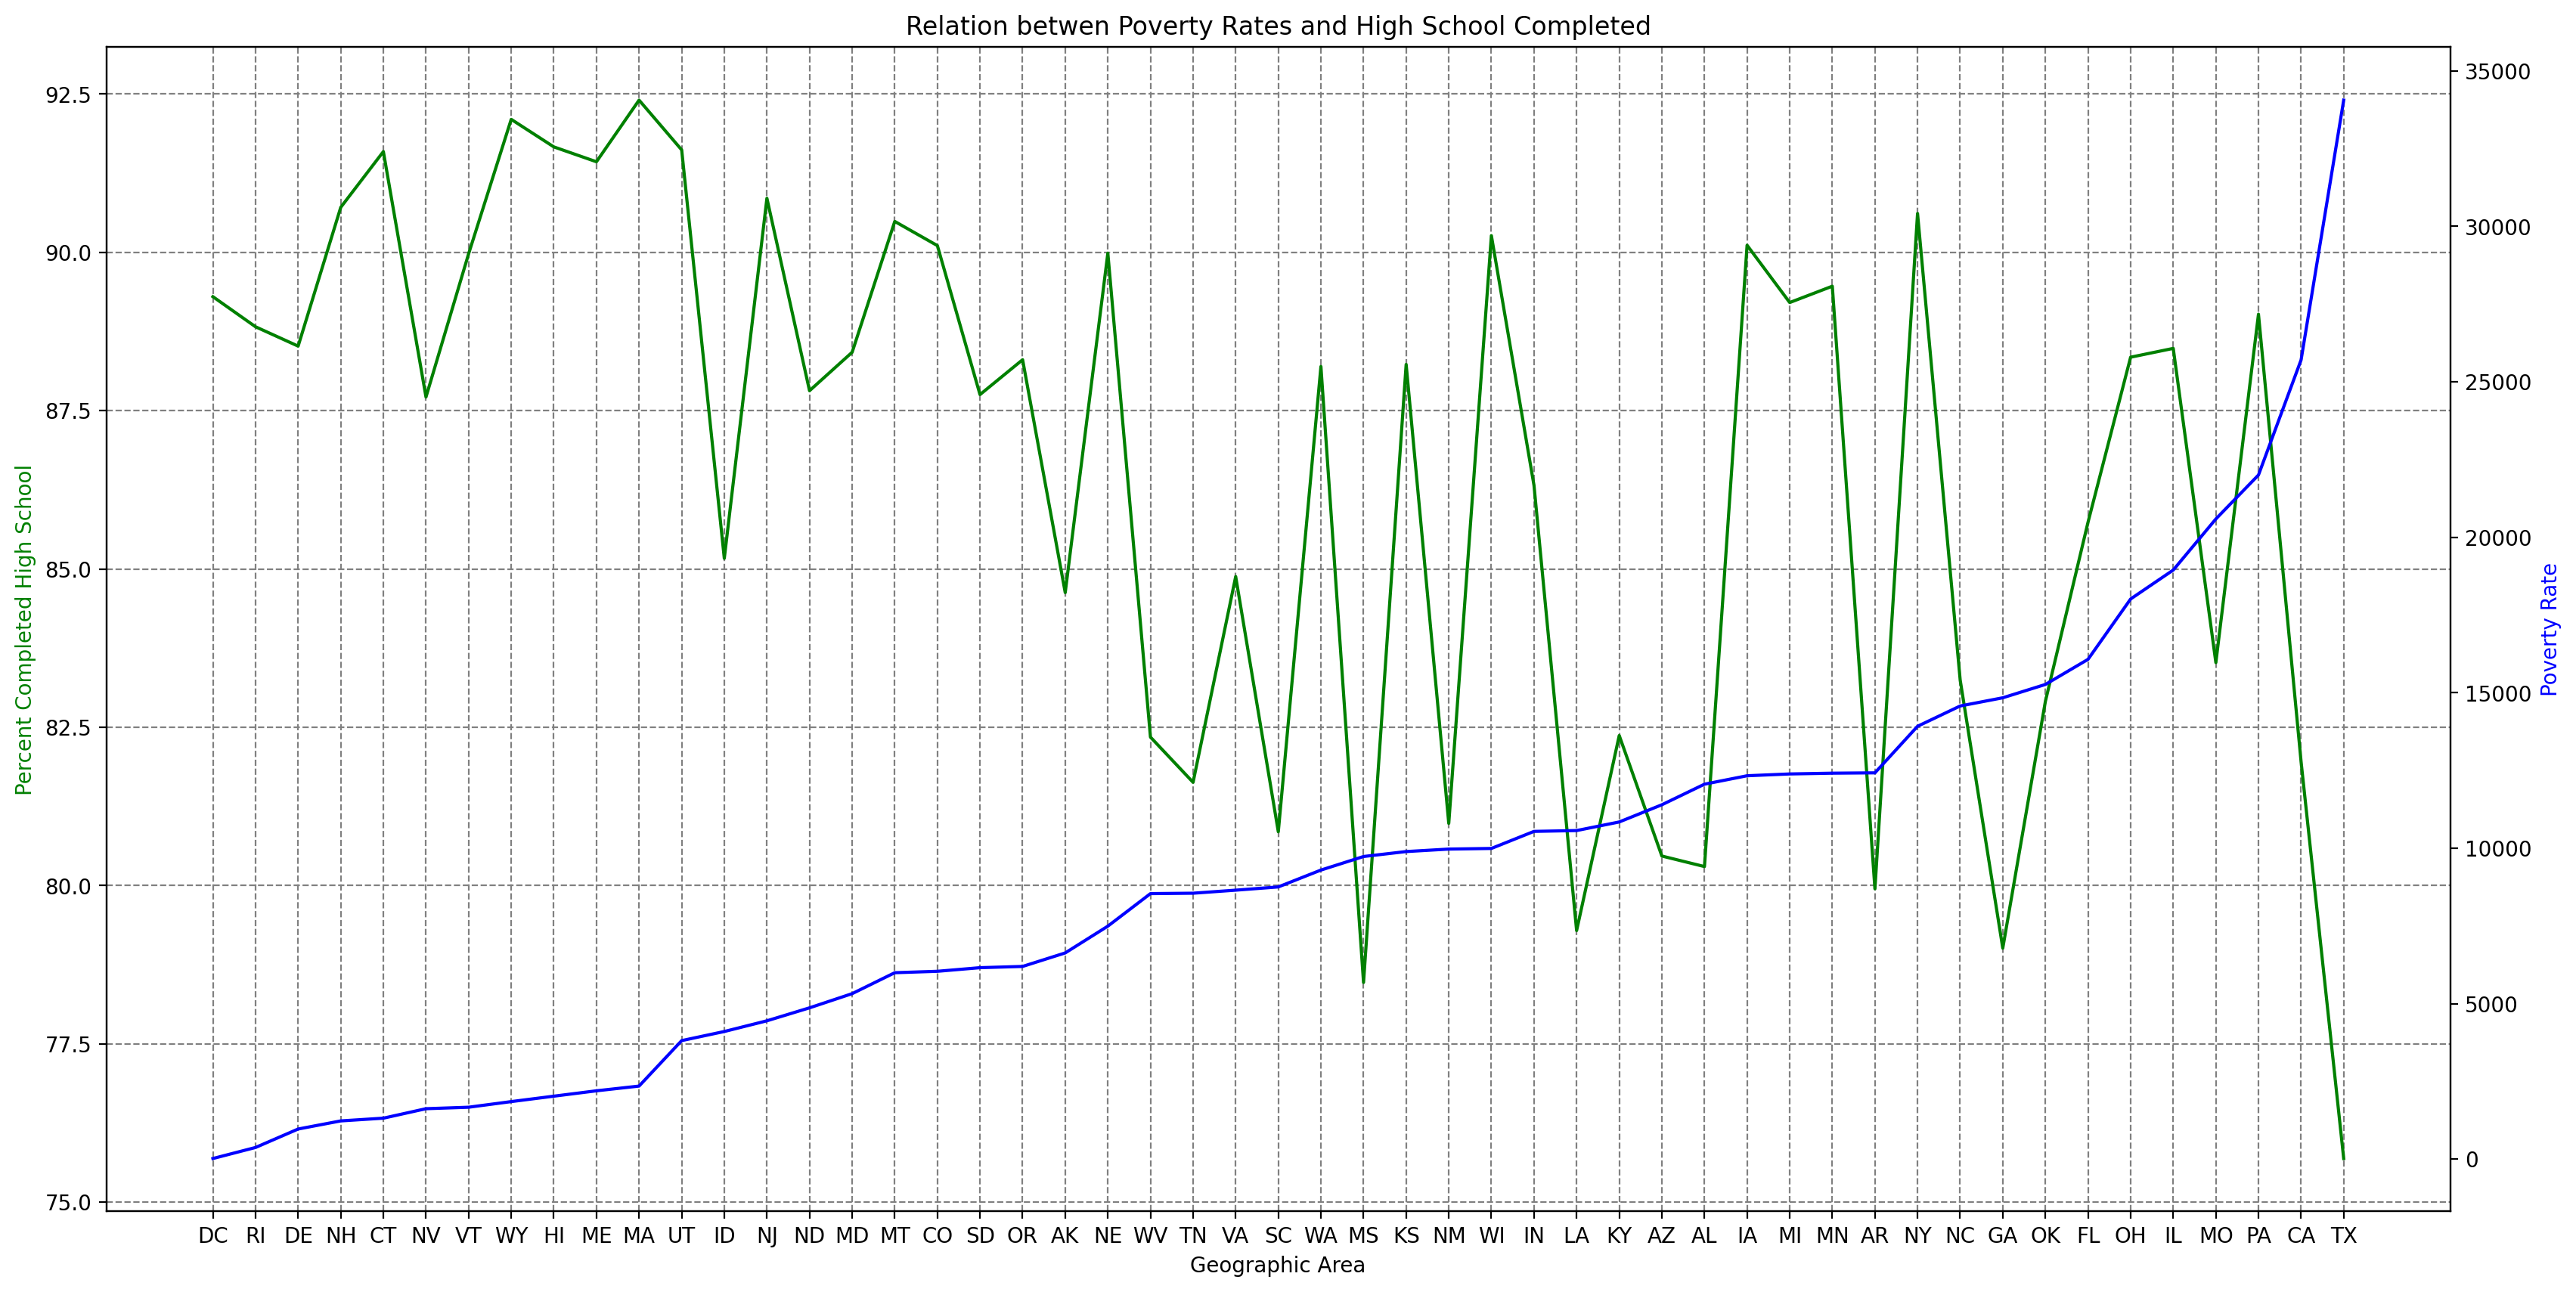

In [104]:
plt.figure(figsize=(20,10), dpi=200)
plt.title("Relation betwen Poverty Rates and High School Completed")
ax1 = plt.gca() #get the axis
ax2 = plt.twinx() #create another axis that shares the same x-axis

# add styling
ax1.grid(color="grey", linestyle="--")
ax1.plot(poverty_rates_and_high_school["Geographic Area"], poverty_rates_and_high_school["percent_completed_hs"], color="g")
ax1.get_autoscale_on
ax2.plot(poverty_rates_and_high_school["Geographic Area"], poverty_rates_and_high_school["poverty_rate"], color="b")
ax2.get_autoscale_on

ax1.set_xlabel("Geographic Area")
ax1.set_ylabel("Percent Completed High School", color="green")
ax2.set_ylabel("Poverty Rate", color="blue")
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 2000x1000 with 0 Axes>

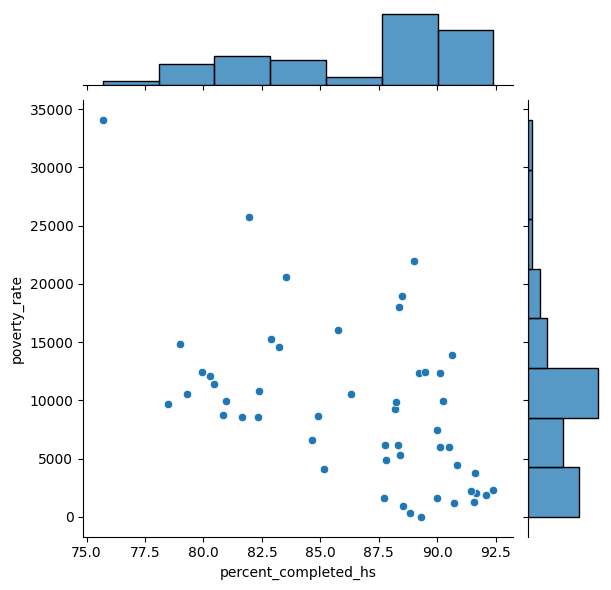

In [105]:
plt.figure(figsize=(20,10))
sns.jointplot(data=poverty_rates_and_high_school, x="percent_completed_hs", y="poverty_rate",
             kind="scatter")
plt.show()

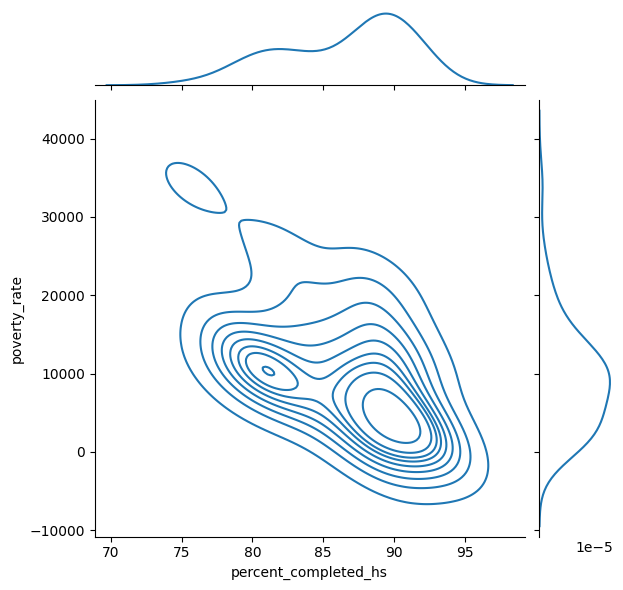

In [106]:
sns.jointplot(data=poverty_rates_and_high_school, x="percent_completed_hs", y="poverty_rate",
             kind="kde")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

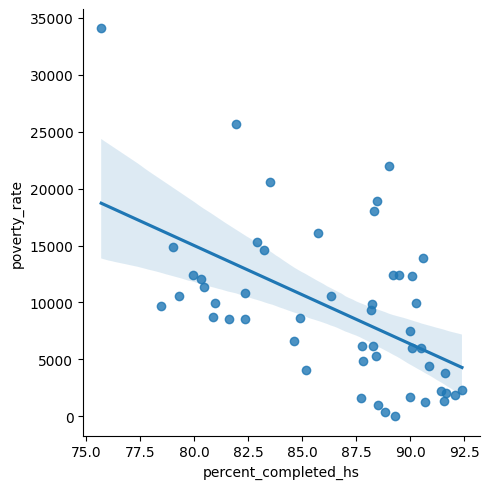

In [107]:
g = sns.lmplot(data=poverty_rates_and_high_school, x="percent_completed_hs", y="poverty_rate")

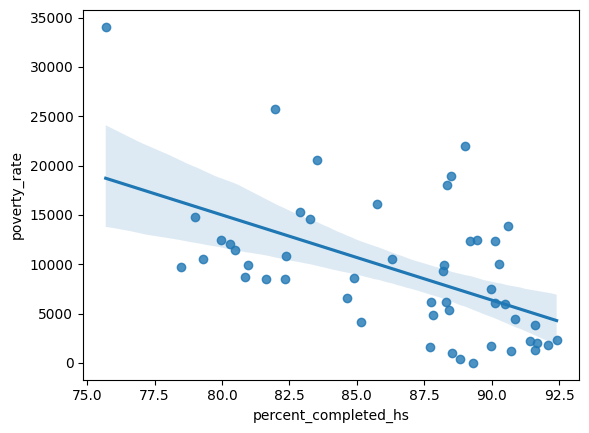

In [108]:
ax = sns.regplot(data=poverty_rates_and_high_school, x="percent_completed_hs", y="poverty_rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [109]:
df_share_race_city.head(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
5,AL,Alabaster city,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,22.6,74.9,0.1,0,1.2


In [110]:
df_share_race_city.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [111]:
numeric_column=["share_white","share_black",'share_native_american',"share_asian","share_hispanic"]
for column in numeric_column:
    df_share_race_city[column] = pd.to_numeric(df_share_race_city[column], downcast='float', errors='coerce')

In [112]:
# numeric_column=["share_white","share_black",'share_native_american',"share_asian","share_hispanic"]
# df_share_race_city.loc[:, numeric_column] = pd.to_numeric(df_share_race_city[numeric_column].values.ravel(), 'coerce')

In [113]:
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float32
share_black              float32
share_native_american    float32
share_asian              float32
share_hispanic           float32
dtype: object

In [114]:
make_up_of_each_state = df_share_race_city.groupby("Geographic area")
make_up_of_each_state = make_up_of_each_state[numeric_column].mean()
make_up_of_each_state.dtypes

share_white              float32
share_black              float32
share_native_american    float32
share_asian              float32
share_hispanic           float32
dtype: object

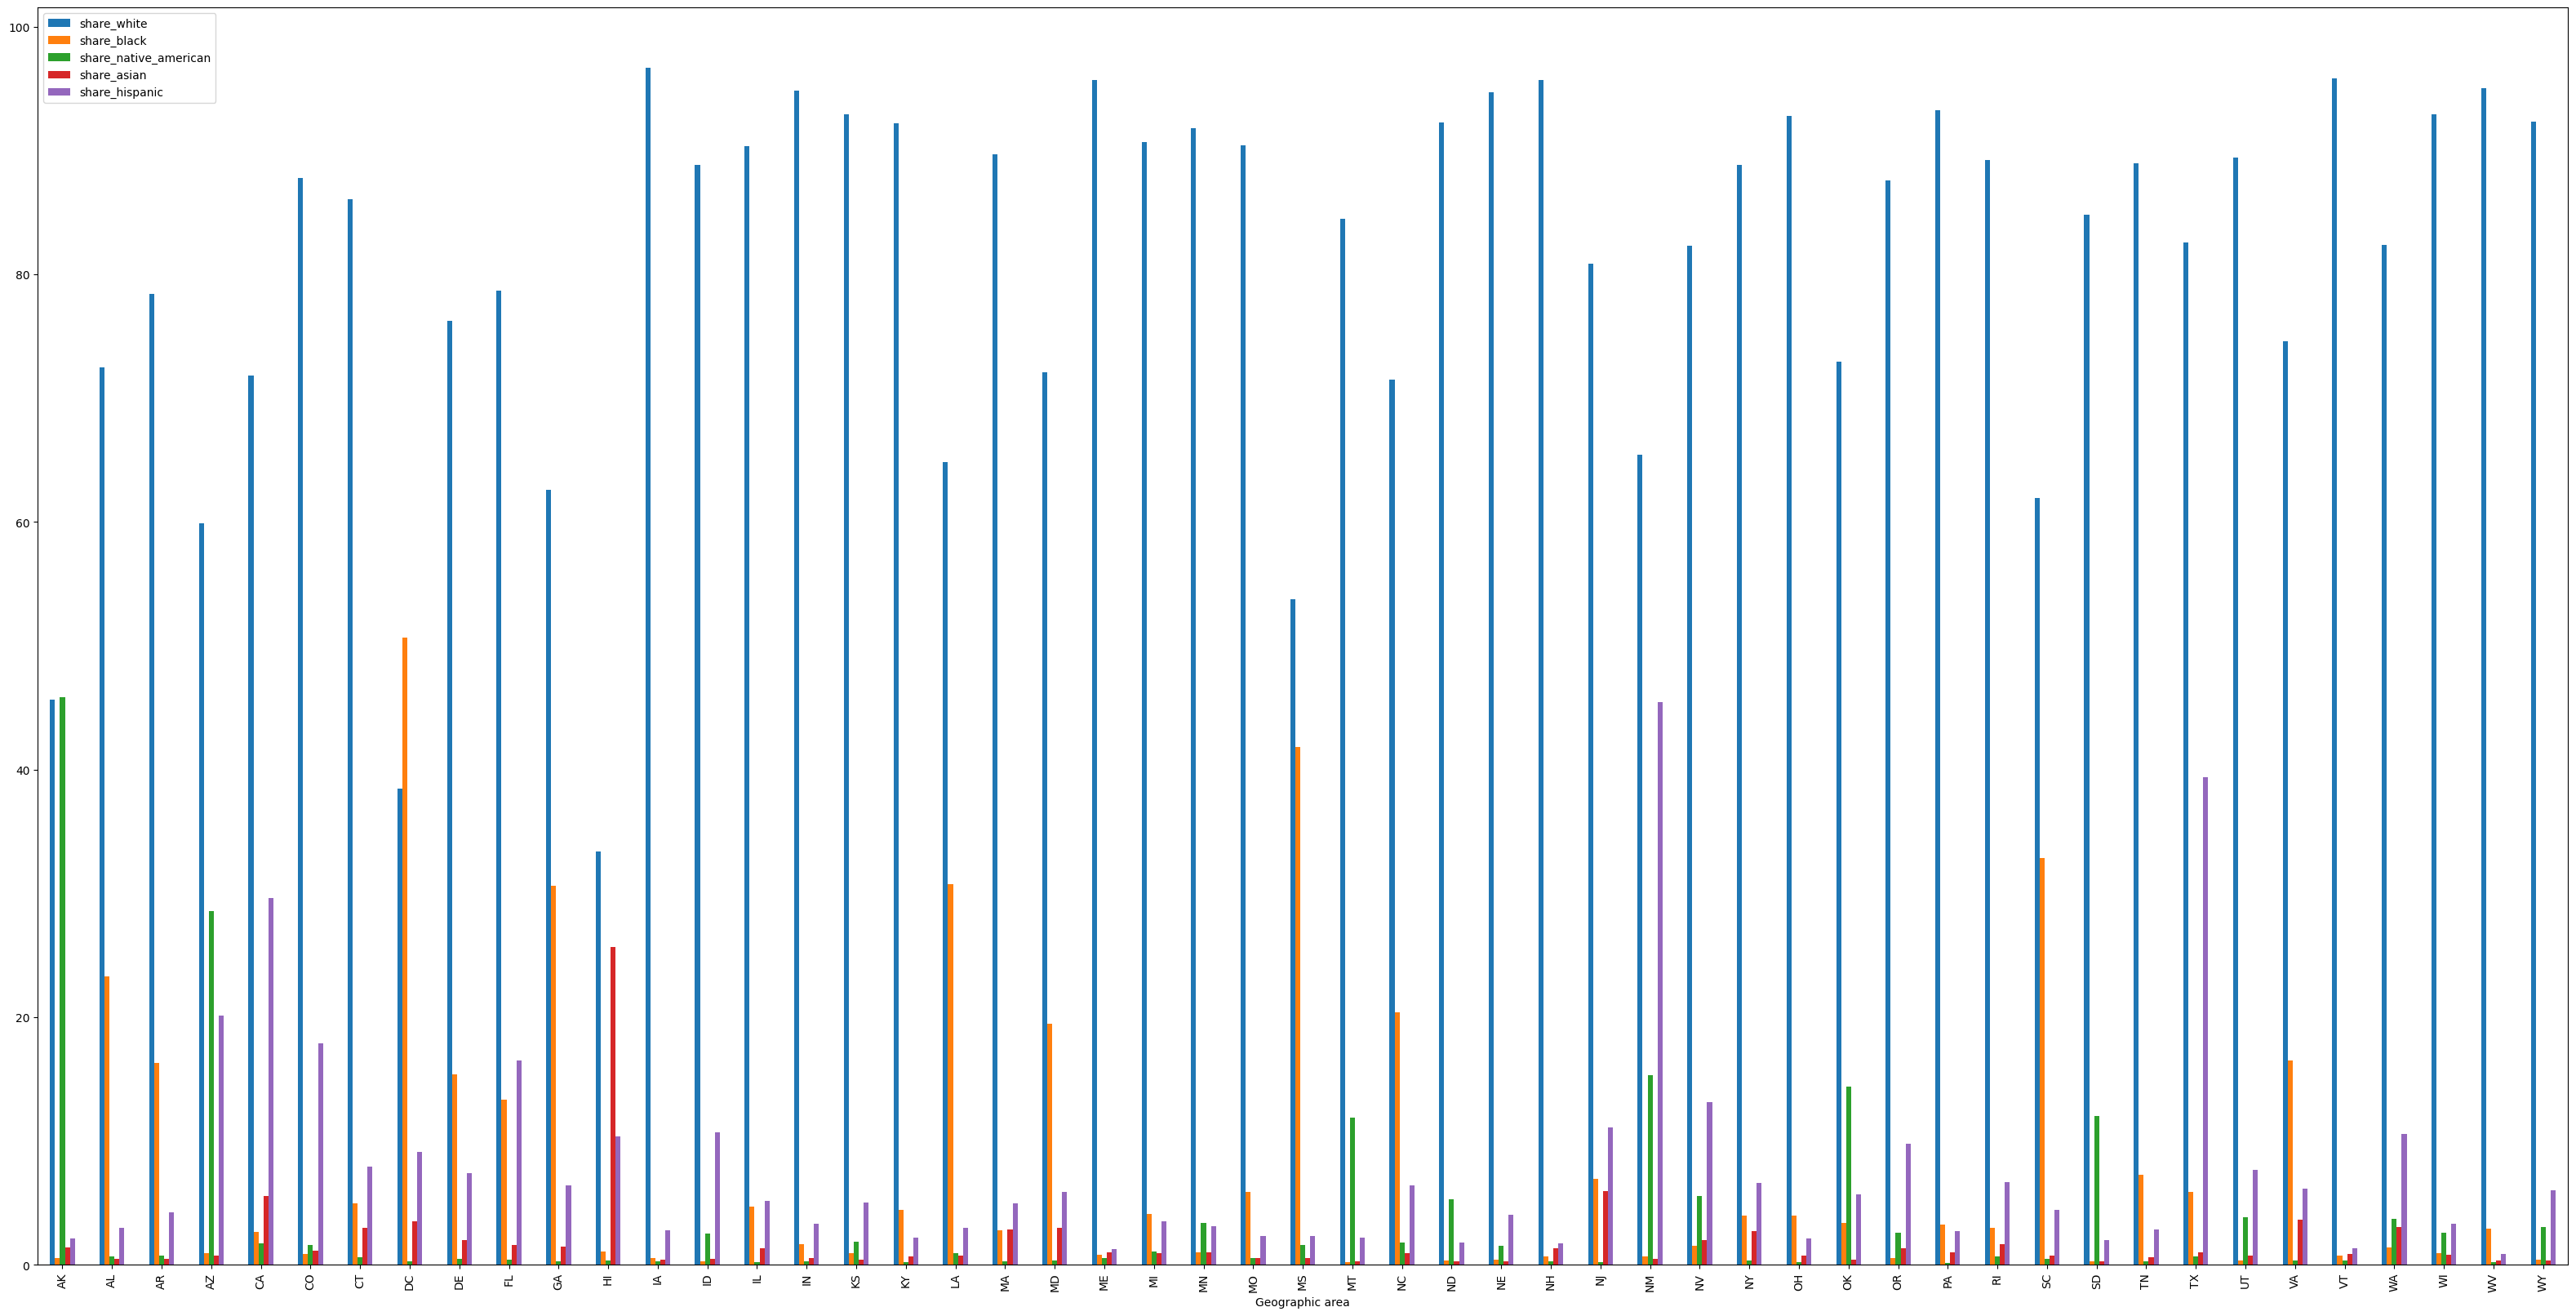

In [115]:
bar_chart = make_up_of_each_state.plot.bar(figsize=(40,20))

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [116]:
df_fatalities_cleaner.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.00,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [117]:
df_fatalities_cleane_race = df_fatalities_cleaner["race"].value_counts()
df_fatalities_cleane_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

In [118]:
pie_race = px.pie(names=df_fatalities_cleane_race.index,
                 values=df_fatalities_cleane_race.values,
                 title="People Killed by Race",
                 hole=0.4)
pie_race.update_traces(textinfo="label+percent",textposition="inside",
                        insidetextorientation='radial',)
pie_race.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [119]:
df_fatalities_cleaner_gender = df_fatalities_cleaner["gender"].value_counts()
df_fatalities_cleaner_gender

M    2428
F     107
Name: gender, dtype: int64

In [120]:
gender_bar = px.bar(df_fatalities_cleaner_gender,
                   x=df_fatalities_cleaner_gender.index,
                   y=df_fatalities_cleaner_gender.values,
                   title="Total Number of Deaths by Gender")
gender_bar.update_layout(xaxis_title="Gender",
                        yaxis_title="Value")
gender_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [121]:
df_fatalities_cleaner.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [122]:
age = df_fatalities_cleaner[df_fatalities_cleaner["age"]!=0]
fig = px.box(age, x="gender", y="age")
fig.show()

In [123]:
fig = px.box(age, x="manner_of_death", y="age")
fig.show()

In [124]:
# Without removing age with value 0
fig = px.box(df_fatalities_cleaner, x="gender", y="age")
fig.show()

In [125]:
fig = px.box(df_fatalities_cleaner, x="manner_of_death", y="age")
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [126]:
df_fatalities_cleaner.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.00,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [127]:
armed = df_fatalities_cleaner["armed"].value_counts()
armed

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

In [128]:
pie_armed = px.pie(names=armed.index,
                 values=armed.values,
                 title="People Armed",
                 hole=0.4)
pie_armed.update_traces(textinfo="label+percent",textposition="inside",
                        insidetextorientation='radial',)
pie_armed.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [129]:
# Use the last variable 'age' to remove age with value 0
teenager = age[age["age"]<=25]
teenager_under_25 = teenager.id.sum()/age.id.sum()*100
print(f"Percentage of people killed under 25 years old is : {round(teenager_under_25,2)}%")

Percentage of people killed under 25 years old is : 23.13%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [130]:
killed_by_police = df_fatalities_cleaner[df_fatalities_cleaner["armed"]=="gun"]
killed_by_police_age = killed_by_police[killed_by_police["age"]!=0]
killed_by_police_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2804,TK TK,26/07/17,shot,gun,35.00,M,0,Phoenix,AZ,False,attack,Other,False
2524,2816,Jerauld Phillip Hammond II,27/07/17,shot,gun,46.00,M,0,Los Angeles,CA,False,other,Not fleeing,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False


<Axes: xlabel='age', ylabel='Count'>

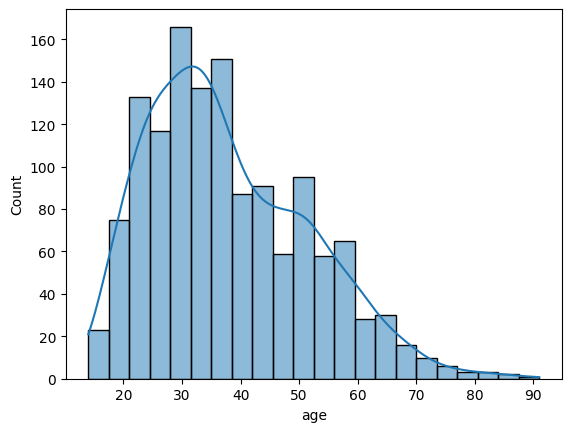

In [131]:
sns.histplot(data=killed_by_police_age, x="age", kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

Text(0.5, 1.0, 'Kill W')

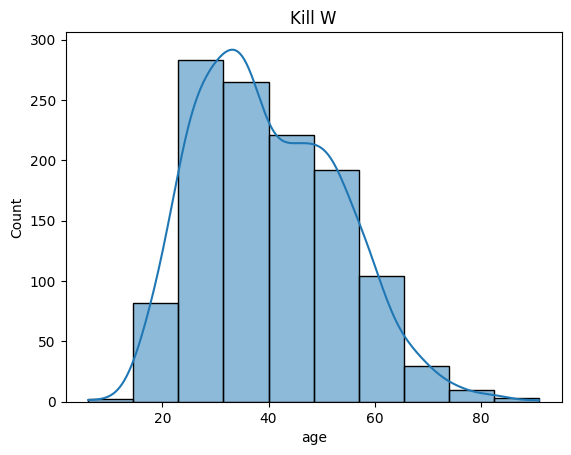

In [132]:
# races = ["W","B","H","A","N","O","0"]
# for race in races:
#     if race=="W":
#     if race=='B':

raced_W = age[age["race"]=="W"]
sns.histplot(data=raced_W, x="age",kde=True,bins=10).set_title("Kill W")

Text(0.5, 1.0, 'Kills B')

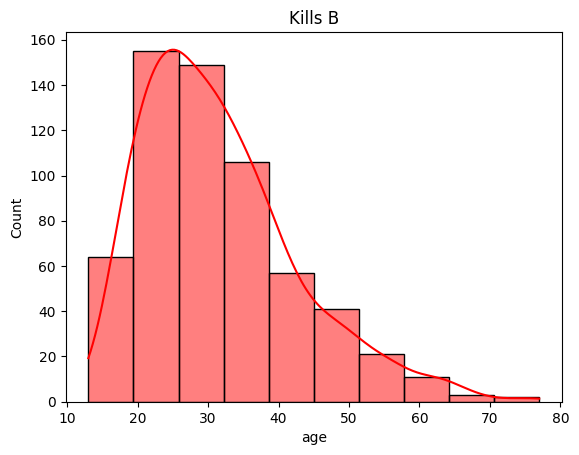

In [133]:
raced_B = age[age["race"]=="B"]
sns.histplot(data=raced_B, x="age",kde=True,bins=10,color="red").set_title("Kills B")

Text(0.5, 1.0, 'Kills H')

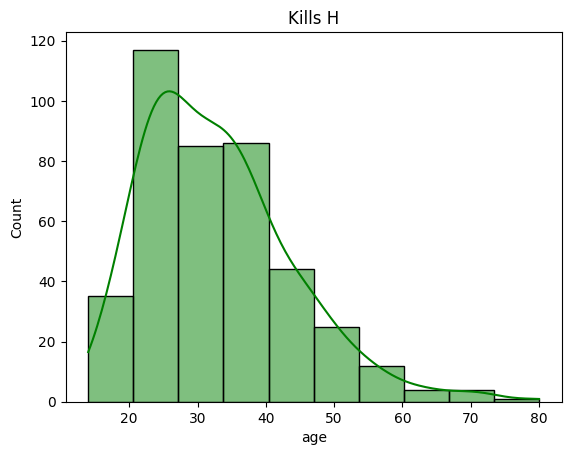

In [134]:
raced_H = age[age["race"]=="H"]
sns.histplot(data=raced_H, x="age",kde=True,bins=10,color="green").set_title("Kills H")

Text(0.5, 1.0, 'Kills A')

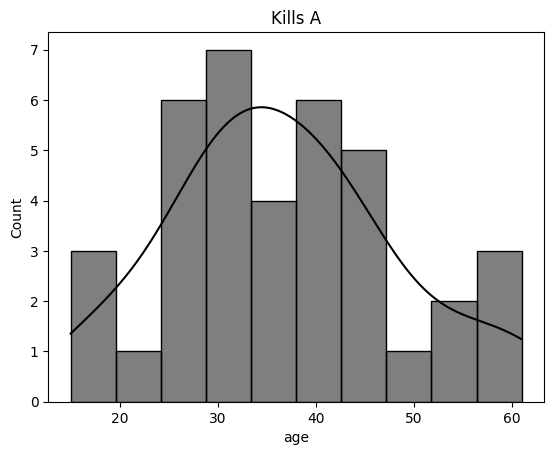

In [135]:
raced_A = age[age["race"]=="A"]
sns.histplot(data=raced_A, x="age",kde=True,bins=10,color="black").set_title("Kills A")

Text(0.5, 1.0, 'Kills N')

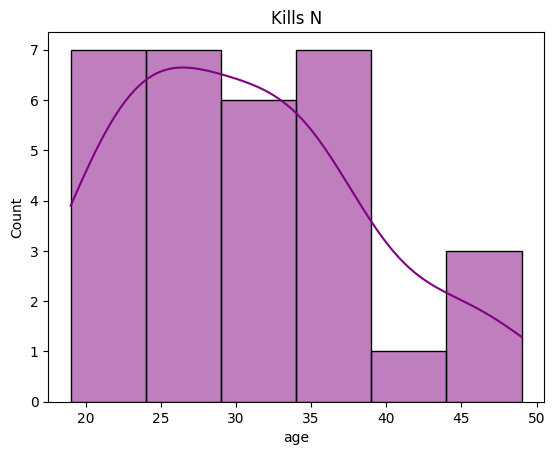

In [136]:
raced_N = age[age["race"]=="N"]
sns.histplot(data=raced_N, x="age",kde=True,color="purple").set_title("Kills N")

Text(0.5, 1.0, 'Kills O')

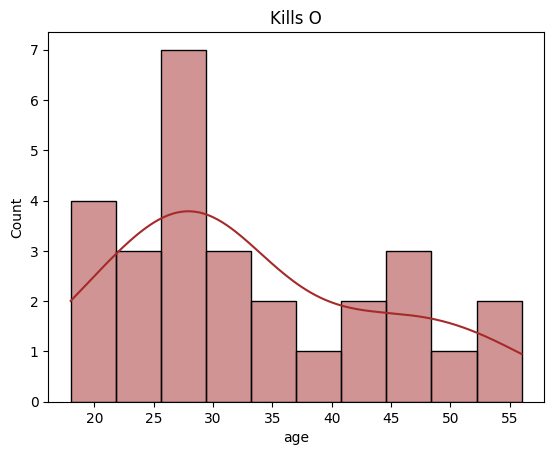

In [137]:
raced_O = age[age["race"]=="O"]
sns.histplot(data=raced_O, x="age",kde=True,bins=10,color="brown").set_title("Kills O")

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [138]:
race_of_people_killed = age["race"].value_counts()
race_of_people_killed

W    1192
B     609
H     413
0     147
A      38
N      31
O      28
Name: race, dtype: int64

In [139]:
bar_race_of_people_killed = px.bar(race_of_people_killed,x=race_of_people_killed.index,
                                  y=race_of_people_killed.values, title="People Killed by Race")
bar_race_of_people_killed.update_layout(xaxis_title="Race", yaxis_title="Count")
bar_race_of_people_killed.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [140]:
killed_by_police_age_and_mental_illness = killed_by_police_age[killed_by_police_age["signs_of_mental_illness"]==True]
killed_by_police_age_and_mental_illness

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
21,42,Tommy Smith,11/01/15,shot,gun,39.00,M,W,Arcola,IL,True,attack,Not fleeing,False
28,51,Mario Jordan,14/01/15,shot,gun,34.00,M,B,Chesapeake,VA,True,attack,Not fleeing,False
34,60,Quincy Reed Reindl,15/01/15,shot,gun,24.00,M,W,Bloomington,MN,True,attack,Not fleeing,False
42,80,Jonathan Guillory,18/01/15,shot,gun,32.00,M,W,Maricopa,AZ,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2780,TK TK,15/07/17,shot,gun,23.00,M,0,Moreno Valley,CA,True,other,Not fleeing,False
2502,2787,Robert Earl Vaughan,18/07/17,shot,gun,70.00,M,0,Springfield,OR,True,other,Not fleeing,False
2512,2796,Michael Caponigro,23/07/17,shot,gun,59.00,M,W,Eau Claire,WI,True,attack,Not fleeing,False
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.00,M,W,St. Louis,MO,True,attack,Car,False


In [141]:
percentage_police_mental_illnes = killed_by_police_age_and_mental_illness.id.sum()/killed_by_police_age.id.sum()*100
print(f"Poice killed people with mental illnes is only {round(percentage_police_mental_illnes,2)}%")

Poice killed people with mental illnes is only 19.87%


In [142]:
# With Out Mental Illnes
killed_by_police_age_without_mental_illness = killed_by_police_age[killed_by_police_age["signs_of_mental_illness"]==False]
killed_by_police_age_without_mental_illness

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.00,M,W,Assaria,KS,False,attack,Not fleeing,False
11,21,Ron Sneed,07/01/15,shot,gun,31.00,M,B,Freeport,TX,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2804,TK TK,26/07/17,shot,gun,35.00,M,0,Phoenix,AZ,False,attack,Other,False
2524,2816,Jerauld Phillip Hammond II,27/07/17,shot,gun,46.00,M,0,Los Angeles,CA,False,other,Not fleeing,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False


In [143]:
percentage_police_without_mental_illnes = killed_by_police_age_without_mental_illness.id.sum()/killed_by_police_age.id.sum()*100
print(f"Poice killed people with mental illnes is only {round(percentage_police_without_mental_illnes,2)}%")

Poice killed people with mental illnes is only 80.13%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [144]:
# killed_by_police
dangerous_city = killed_by_police["city"].value_counts()
top_dangerous_city=dangerous_city[:10]

In [145]:
dangerous_city_bar = px.bar(top_dangerous_city, x=top_dangerous_city.index, y=top_dangerous_city.values,
                           title="Top 10 Dengerous City with Police most did Killings")
dangerous_city_bar.update_layout(xaxis_title="City",
                                yaxis_title="Count")
dangerous_city_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [146]:
threat_level = pd.DataFrame(df_fatalities_cleaner.groupby(by=["city"])["threat_level"].count()).reset_index().sort_values("threat_level",ascending=False)
threat_level_city = pd.DataFrame(threat_level.city[10:])


In [147]:
top_threat_level = pd.DataFrame(df_fatalities_cleaner.groupby(["city","race"])["threat_level"].count()).reset_index()
city_race = top_threat_level.set_index("city")
top_threat_level_city = city_race[~city_race.index.isin(threat_level_city.city)]
top_threat_level_city

,race,threat_level
city,,
Austin,B,3
Austin,H,2
Austin,W,13
Chicago,0,1
Chicago,B,21
Chicago,H,1
Chicago,W,2
Columbus,0,1
Columbus,B,11


In [148]:
top_threat_level_city = top_threat_level_city.groupby(["city","race"])["threat_level"].sum().reset_index().sort_values("city",ascending=True)

In [149]:
fig = px.bar(top_threat_level_city, x="city", y="threat_level", color="race", title="Rate Death by Race")
fig.show()

In [150]:
# top_dangerous_city = threat_level.groupby(by=["city","race"])["threat_level"].sum()
# top_dangerous_city

In [151]:
dangerous_city = killed_by_police.groupby(["city","race"],as_index=False)["threat_level"].sum()
top_dangerous_city = dangerous_city["city"].value_counts()
top_dangerous_city

Houston        6
Phoenix        5
Orlando        4
Charlotte      4
Los Angeles    4
              ..
Goose Creek    1
Goshen         1
Grafton        1
Grand Forks    1
Zion           1
Name: city, Length: 892, dtype: int64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [152]:
killing_by_us_state = df_fatalities_cleaner.groupby("state").agg({"threat_level":pd.Series.count}).reset_index()
killing_by_us_state

,state,threat_level
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424
5,CO,74
6,CT,9
7,DC,11
8,DE,8
9,FL,154


In [153]:
fig = px.choropleth(killing_by_us_state, locations="state",
                    color="threat_level", # lifeExp is a column of gapminder
                    scope="usa", # column to add to hover information
                    title="Map of Police Killing by USA State",
                    color_continuous_scale="Viridis",
                    labels={"color":"Kills","location":"USA State"},
                    locationmode="USA-states"
                   )
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [154]:
df_fatalities_cleaner

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [155]:
df_fatalities_cleaner['date'] = pd.to_datetime(df_fatalities_cleaner['date'])
# df_fatalities_cleaner["date"] = df_fatalities_cleaner["date"].dt.strftime("%m/%Y")
df_fatalities_cleaner["year"] = df_fatalities_cleaner["date"].dt.strftime("%Y")
df_fatalities_cleaner

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,2017
2531,2813,TK TK,2017-07-28,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,2017
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,2017
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017


In [156]:
df_fatalities_cleaner["date"] = df_fatalities_cleaner["date"].dt.strftime("%m/%Y")

In [157]:
months_year = df_fatalities_cleaner.groupby(["date","year"]).agg({"threat_level":pd.Series.count}).reset_index().sort_values("year",ascending=True)
months_year

,date,year,threat_level
0,01/2015,2015,70
27,10/2015,2015,89
21,08/2015,2015,86
18,07/2015,2015,85
15,06/2015,2015,68
24,09/2015,2015,90
30,11/2015,2015,80
9,04/2015,2015,88
12,05/2015,2015,85
6,03/2015,2015,87


In [158]:
fig = px.bar(months_year, x="date", y="threat_level", title="Number of Police Killing Over Time")
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).